# Primer Examen 15%

A) Cargando el archivo JSON: 
* https://github.com/restrepo/anomaly/raw/main/solutions.json.gz

en Pandas

1) Adicione una columna nueva `'smax'` con el valor máximo en valor absoluto de la lista de enteros de la correspondiente entrada en la columna '`solution`'
2) Adicione dos columnas nuevas: `'sum_s'` (`sum_s³`) con el resultado de la suma (al cubo) de todos los números de la lista de enteros de la correspondiente entrada en la columna '`solution`'
3) Usando como semilla el número de su cédula, genere un número entero de forma aleatoria entre 0 y 390073. Seleccione el la fila correspondiente a ese número entero y construya un polinomio con esos coeficientes. Encuentre las raices reales de ese polinomio y realice el correspondiente gráfico incluyendo: el polinomio generado, sus raices (como puntos en gráfico) y la derivada del polinomio. Optimize el rango de valores en el eje $x$ y en el eje $y$ del gráfico, de manera que el polinomio y sus raices se visualicen de la mejor forma posible. (Sugerencia → use: `plt.ylim(ymin,ymax)` ). Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo


B)

I) Usando como semilla el número de su cédula, genere de forma aletoria un número entero entre 1 y 5

II) De acuerdo al entero obtenido, escoja una de las siguientes cinco funciones 
1. $$x\operatorname{e}^x=p\,, $$
2. $$\frac{\sin x}{x}=+p\,,$$
3. $$\frac{\sin x}{x}=-p\,,$$
4. $$\frac{\cos x}{x}=+p\,,$$
5. $$\frac{\cos x}{x}=-p\,,$$
III) Genere un número aleatorio entre 0 y 1 y asignelo al valor de $p$
IV) Encuentre la solución a la ecuación trascendental para el intervalo $x$ entre -10 y 10 y gráfique la correspondiente función trascendental y las correspondientes soluciones. . Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo.

A modo de nota curiosa: estas ecuaciones trascendentales están asociadas a soluciones de la ecuación de Schödinger en mecánica cuántica: https://doi.org/10.1080/14786435.2015.1081425

In [199]:
#Liberias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import optimize

## A) Punto A

In [135]:
df = pd.read_json('https://github.com/restrepo/anomaly/raw/main/solutions.json.gz') # Crear df de apartir del archivo JSON
df

,l,k,solution,gcd,n
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11
...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8


#### 1) Adicione una columna nueva 'smax' con el valor máximo en valor absoluto de la lista de enteros de la correspondiente entrada en la columna 'solution'

In [136]:
df['smax'] = np.nan # Crear la columna smax, sin valores asginados.

for i in range (0,390074): # Ciclo para agregar el valor máximo en valor absoluto de la lista de enteros de la correspondiente entrada en la columna 'solution'.
  df['smax'][i] = np.absolute(np.array(df.loc[i]['solution'])).max()
df


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,l,k,solution,gcd,n,smax
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6.0
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4.0
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6.0
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7.0
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8.0
...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32.0
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28.0
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32.0
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31.0


#### 2) Adicione dos columnas nuevas: 'sum_s' (sum_s³) con el resultado de la suma (al cubo) de todos los números de la lista de enteros de la correspondiente entrada en la columna 'solution'.

In [137]:
df['sum_s'] = np.nan  # Crear la columna sum_s, sin valores asginados.
df['sum_s3'] = np.nan # Crear la columna sum_s3, sin valores asginados.

for i in range (0,390074): # Ciclo para agregar las suma y la suma al cubo.
  df['sum_s'][i] = np.sum((np.array(df.loc[i]['solution'])))
  df['sum_s3'][i] = np.sum((np.array(df.loc[i]['solution'])))**3
df


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,l,k,solution,gcd,n,smax,sum_s,sum_s3
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6.0,0.0,0.0
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4.0,0.0,0.0
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6.0,0.0,0.0
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7.0,0.0,0.0
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8.0,0.0,0.0
...,...,...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32.0,0.0,0.0
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28.0,0.0,0.0
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32.0,0.0,0.0
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31.0,0.0,0.0


#### 3) Usando como semilla el número de su cédula, genere un número entero de forma aleatoria entre 0 y 390073. Seleccione el la fila correspondiente a ese número entero y construya un polinomio con esos coeficientes. Encuentre las raices reales de ese polinomio y realice el correspondiente gráfico incluyendo: el polinomio generado, sus raices (como puntos en gráfico) y la derivada del polinomio. Optimize el rango de valores en el eje  x  y en el eje  y  del gráfico, de manera que el polinomio y sus raices se visualicen de la mejor forma posible. (Sugerencia → use: plt.ylim(ymin,ymax) ). Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo

In [175]:
np.random.seed(1152468237) # Asgina la semilla.
random_number = np.random.randint(0, 390074)
print(random_number)

186008


In [190]:
coefficients = np.array(df.loc[random_number]['solution']) # Crear numpy array con los coeficientes.
print(coefficients)

[  4  -6  -6   7   7   8 -15  16 -19 -19  23]


In [191]:
polynomial = np.polynomial.Polynomial(coefficients) # Crea el polinomio.
polynomial

Polynomial([  4.,  -6.,  -6.,   7.,   7.,   8., -15.,  16., -19., -19.,  23.], domain=[-1,  1], window=[-1,  1])

In [192]:
roots = polynomial.roots()
roots

array([-1.11123489+0.00000000e+00j, -0.712251  +0.00000000e+00j,
       -0.45219337-6.30004401e-01j, -0.45219337+6.30004401e-01j,
        0.1751078 -9.23611792e-01j,  0.1751078 +9.23611792e-01j,
        0.60187199-2.26279999e-01j,  0.60187199+2.26279999e-01j,
        1.        -1.68747427e-08j,  1.        +1.68747427e-08j])

El polinomio pedido no tiene raices reales.

#### Grafica del polinomio.


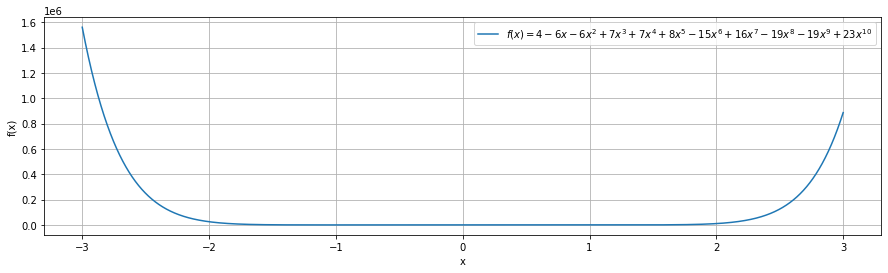

In [295]:
x = np.linspace(-3,3, 10000)
plt.figure(figsize=(15, 4))
plt.plot(x, polynomial(x), label='$f(x)= 4-6x-6x^2+7x^3+7x^4+8x^5-15x^6+16x^7-19x^8-19x^9+23x^{10}$')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.legend()
plt.show()

# b) Punto B

#### I) Usando como semilla el número de su cédula, genere de forma aletoria un número entero entre 1 y 5

In [194]:
np.random.seed(1152468237) # Asgina la semilla.
n = np.random.randint(1, 6)
print(n)

3


#### II) De acuerdo al entero obtenido, escoja una de las siguientes cinco funciones
3. $$\frac{\sin x}{x}=-p\,,$$

#### III) Genere un número aleatorio entre 0 y 1 y asignelo al valor de  p

In [195]:
np.random.seed(1152468237) # Asgina la semilla.
p = np.random.randint(0, 2)
print(p)

0


#### IV) Encuentre la solución a la ecuación trascendental para el intervalo  x  entre -10 y 10 y gráfique la correspondiente función trascendental y las correspondientes soluciones. . Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo.

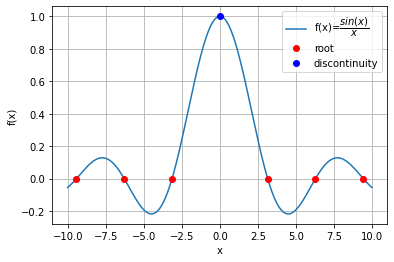

Las raices de la función f son: [-9.424777960769374, -6.283185307179527, -3.1415926535897936, 3.141592653589793, 6.283185307179576, 9.42477796076938] 


In [268]:

def f(x): return np.sin(x)/x
"""
  La función f toma los valores de 0 cuando sin(x) = 0, es decir en A = {0, pi} y sus multiplos pero 0 queda 
  descartado dado el que la función no exite en x = 0, por lo tanto la función tenda ceros en los multiplos de pi,
  dado el intervalo [-10,10] estos valores seran A' = {-3pi, -2pi, pi, pi, 2pi, 3pi}
"""
root_f = [] # Array para almacenar las raices.
pi_multiplet = [-3, -2, -1, 1, 2, 3]

for i in pi_multiplet:
  root_f.append(optimize.newton(f, i*np.pi-0.1))

np.array(root_f)
df_root_value = pd.DataFrame()
df_root_value['root'] = root_f
df_root_value['value'] = f(root_f)

#Crear figura
x = np.linspace(-10,10, 1000)
plt.figure()
plt.plot(x, f(x), label="f(x)=$\dfrac{sin(x)}{x}$")
plt.plot(df_root_value['root'], df_root_value['value'], 'ro', label='root')
plt.plot(0,1,'bo', label = 'discontinuity')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.legend()
plt.show()

print('Las raices de la función f son: {} '.format(root_f))